Code cleanup. Upon analyzing the code, it looks like
1. repeated sentences
2. There's some shit going on with emojis
3. There are some words concatenated together, especially the last word of a sentence and the first word of the next sentence.
We need to get rid of these things.
Data cleaning.

In [2]:
LIST_OF_CHANNEL_IDS = [
"UCsDmESjqNPukDmVnuneLrqw",
"UCY6Ij8zOds0WJEeqCLOnqOQ",
"UClN24S5-fc7LD0JJW0FdGWw",
"UC3iNdSV_RQU7DHTGpqEW96w",
"UC_52i6mlrzOZs_NEuSepzAg",
"UCr3cBLTYmIK9kY0F_OdFWFQ",
"UCV6g95OBbVtFmN9uiJzkFqQ",
"UCgCKYs56-LKEPGQ99DzqQOg",
"UCOwxx9VnEnlFKt5EB70KTzQ",
"UC2Ds30pkifFVD0CE08wF50g",
"UC7UGbBVrqLlq6CRxWWUmyKw",
"UCn1XB-jvmd9fXMzhiA6IR0w",
"UCFeqAfEuKm7lIg2ddQzh61A",
"UCAlxwHEm1bWWYoe5VCSQYEg",
"UCz7iJPVTBGX6DNO1RNI2Fcg",
"UCOAUz4d1NUNxSHh_SOJtdGQ",
"UCGGTAB19HlHEWPwwmxHsEKA",
"UCOsATJw-IZgqGT8MFrHjKGg",
"UCsKVP_4zQ877TEiH_Ih5yDQ",
"UCOinp9hALPUcZeoL3Kmaviw",
"UCGwu0nbY2wSkW8N-cghnLpA",
"UCu6v4AdYxVH5fhfq9mi5llA",
"UCj74rJ9Lgl3WTngq675wxKg",
"UCNIuvl7V8zACPpTmmNIqP2A",
"UCo8bcnLyZH8tBIH9V1mLgqQ",
"UCR0O-1cvuPNxDosvSDLpWHg",
"UCvUmwreRrbxeR1mbmojj8fg",
"UCUKi4zY5ETSqrKAjTBgjM-g",
"UCDQBZcjYKP1J1Nu-Y0_D37Q",
"UCQ9HvHH-KRYHI5ynj2kbLwQ",
"UCRfg0SWjIHm_h95e4V8X5og",
"UCWPB0WpnMIy-g7zncwIhvQg",
"UCC-slLJZ4p4HOznMUcFn_2g"]

1. Find all files in all 'txt' directories.

In [7]:
import glob
import json
import regex as re
import os
import pandas as pd
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.corpus.reader import *
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jiwonlee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jiwonlee/nltk_data...


In [85]:
def generateListOfWords(filepath):
    with open(filepath, 'r') as f:
        lines = f.readlines()
        strippedLines = [line.strip() for line in lines if line.strip()]
        removedDuplicateLinesList = []
        if len(strippedLines) == 1:
            removedDuplicateLinesList.append(strippedLines[0])
        else:
            for index in range(len(strippedLines)-1):
                removedDuplicateLinesList.append(strippedLines[index])
            print(removedDuplicateLinesList)
        listOfListOfWords = [line.split() for line in removedDuplicateLinesList]
        cleanedListOfWords = flattenListAndCleanWords(listOfListOfWords)
    return cleanedListOfWords

def flattenListAndCleanWords(listOfListOfWords):
    all_stopwords = list(stopwords.words('english'))
    cleanedListOfWords = []
    for listOfWords in listOfListOfWords:
        for words in listOfWords:
            word = re.split('[?."(),!)]', words)
            for wo in word:
                if wo !='' and wo not in all_stopwords:
                    cleanedListOfWords.append(wo)
    
    return cleanedListOfWords

def flattenList(list):
    flat_list = [item for sublist in list for item in sublist]
    return flat_list

wordCloud = {}
for channelId in LIST_OF_CHANNEL_IDS[2:3]:
    listOfWords = []
    for txtFilePath in glob.glob(channelId+"/txt/*.txt")[:1]:
        print(txtFilePath)
        listOfWords.append(generateListOfWords(txtFilePath))
    flattened = flattenList(listOfWords)
    wordCloud[channelId.split('/')[0]] = flattened
    print(channelId.split('/')[0], ": ", len(flattened), "words total")

    with open(channelId.split('/')[0]+"wordCloud.txt", 'w') as f:
        json.dump(flattened, f)

UClN24S5-fc7LD0JJW0FdGWw/txt/QjTyvw4uCoA.txt
True
['today I want to take you on a journey', 'back to when I was a kid and talk about', 'this is also part one of many parts as Ithis is also part one of many parts as I', 'have many stories to tell so sit yourhave many stories to tell so sit your', 'butt down grab some popcorn this isbutt down grab some popcorn this is', 'gonna be fun I hope so you get a quickgonna be fun I hope so you get a quick', 'idea of the kind of kid I was you seenidea of the kind of kid I was you seen', "the film lilo and stitch yeah I'mthe film lilo and stitch yeah I'm", 'basically lilobasically lilo', 'sadly no Elvis I did listen to thesadly no Elvis I did listen to the', 'Pokemon mm soundtrack and Bryan AdamsPokemon mm soundtrack and Bryan Adams', "though that's something I guess I am anthough that's something I guess I am an", 'only child born in the beautiful year ofonly child born in the beautiful year of', '92 and from the moment I could walk and92 and from

Time to analyze using VADER (Valence Aware Dictionary for Sentiment Reasoning) model.

In [73]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
results = []

print(len(wordCloud.keys()))
for channelId in LIST_OF_CHANNEL_IDS:
    for words in wordCloud[channelId]:
        pol_score = sia.polarity_scores(words)
        pol_score['words']=words
        results.append(pol_score)
pd.set_option('display.max_columns', None, 'max_colwidth', None)
df = pd.DataFrame.from_records(results)
df['label']=0
df.loc[df['compound'] > 0.10, 'label'] = 1
df.loc[df['compound'] < -0.10, 'label'] = -1

df.head()

33


,neg,neu,pos,compound,words,label
0,0.0,0.0,0.0,0.0000,I,0
1,1.0,0.0,0.0,-0.3182,lost,-1
2,0.0,1.0,0.0,0.0000,suitcaseRiding,0
3,0.0,1.0,0.0,0.0000,runaway,0
4,0.0,1.0,0.0,0.0000,trainGot,0


In [74]:
print(df.label.value_counts())

 0    2111298
 1     259893
-1      96164
Name: label, dtype: int64


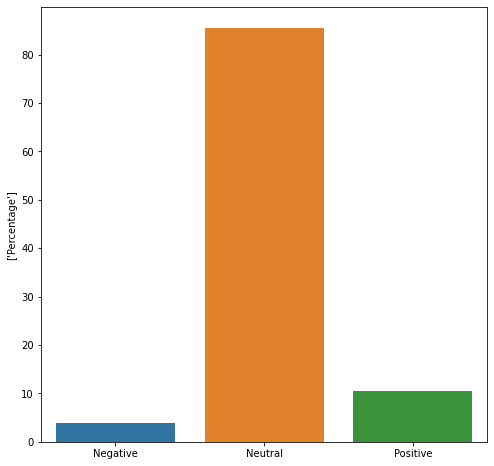

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
fix, ax = plt.subplots(figsize=(8,8))
counts = df.label.value_counts(normalize=True)*100
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel(["Percentage"])
plt.show()

In [76]:
df_positive_negative = df.loc[df['label'] != 0]
df_positive_negative.head()

,neg,neu,pos,compound,words,label
1,1.0,0.0,0.0,-0.3182,lost,-1
22,1.0,0.0,0.0,-0.3182,lost,-1
26,1.0,0.0,0.0,-0.1027,Nah,-1
27,1.0,0.0,0.0,-0.1027,nah,-1
28,1.0,0.0,0.0,-0.1027,nah,-1


In [77]:
print(df_positive_negative.label.value_counts())

 1    259893
-1     96164
Name: label, dtype: int64


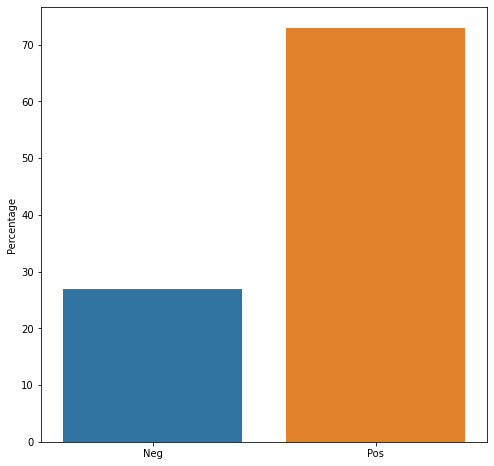

In [78]:
fig, ax = plt.subplots(figsize=(8,8))
counts = df_positive_negative.label.value_counts(normalize=True)*100
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Neg', 'Pos'])
ax.set_ylabel('Percentage')
plt.show()

Basically, compared to redditors, animation youtubers are more 'positive'

Now, per channelID:

In [79]:
channelId_to_df = {}
sia = SIA()
for channelId in LIST_OF_CHANNEL_IDS:
    results = []
    for words in wordCloud[channelId]:
        pol_score = sia.polarity_scores(words)
        pol_score['words']=words
        results.append(pol_score)
    pd.set_option('display.max_columns', None, 'max_colwidth', None)
    df = pd.DataFrame.from_records(results)
    channelId_to_df[channelId] = df
df[100:200]

,neg,neu,pos,compound,words
100,0.0,1.0,0.0,0.0000,man
101,0.0,0.0,0.0,0.0000,I
102,0.0,1.0,0.0,0.0000,*inhale*
103,1.0,0.0,0.0,-0.5719,hate
104,0.0,1.0,0.0,0.0000,songLemme
...,...,...,...,...,...
195,0.0,1.0,0.0,0.0000,red
196,0.0,1.0,0.0,0.0000,Are
197,0.0,0.0,1.0,0.5719,happy
198,0.0,1.0,0.0,0.0000,Look


In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

top_20_pos_words = {}
top_20_neg_words = {}
scores= {}
for channelId in LIST_OF_CHANNEL_IDS:
    target_df = channelId_to_df[channelId]
    positive_words = list(target_df.loc[target_df['pos']==1].words)
    positive_frequency = FreqDist(positive_words)
    pos_freq = positive_frequency.most_common(20)
    negative_words = list(target_df.loc[target_df['neg']==1].words)
    negative_frequency = FreqDist(negative_words)
    neg_freq = negative_frequency.most_common(20)
    # print(channelId)
    # print(pos_freq)
    # print(neg_freq)
    top_20_pos_words[channelId] = pos_freq
    top_20_neg_words[channelId] = neg_freq

    pos_words = [str(p) for p in pos_freq]
    pos_words_str = ', '.join(pos_words)
    neg_words = [str(n) for n in neg_freq]
    neg_words_str = ', '.join(neg_words)

    scores[channelId] = sum(target_df['compound'])/len(target_df)
print(scores)
    # wordcloud_positive = WordCloud(background_color='white').generate(pos_words_str)
    # wordcloud_negative = WordCloud().generate(neg_words_str)

    # plt.imshow(wordcloud_positive, interpolation="bilinear")
    # plt.axis("off")
    # plt.show()
    # plt.imshow(wordcloud_negative, interpolation="bilinear")
    # plt.axis("off")
    # plt.show()

{'UCsDmESjqNPukDmVnuneLrqw': 0.035539657468948674, 'UCY6Ij8zOds0WJEeqCLOnqOQ': 0.034891217609889474, 'UClN24S5-fc7LD0JJW0FdGWw': 0.0312871642832229, 'UC3iNdSV_RQU7DHTGpqEW96w': 0.019118352720657393, 'UC_52i6mlrzOZs_NEuSepzAg': 0.025932020469706617, 'UCr3cBLTYmIK9kY0F_OdFWFQ': 0.022135721419894953, 'UCV6g95OBbVtFmN9uiJzkFqQ': 0.022864217258683893, 'UCgCKYs56-LKEPGQ99DzqQOg': 0.03183374557277939, 'UCOwxx9VnEnlFKt5EB70KTzQ': 0.01895263751127149, 'UC2Ds30pkifFVD0CE08wF50g': 0.023108769040757215, 'UC7UGbBVrqLlq6CRxWWUmyKw': 0.019245182174176406, 'UCn1XB-jvmd9fXMzhiA6IR0w': 0.030268125316887346, 'UCFeqAfEuKm7lIg2ddQzh61A': 0.03732327352558664, 'UCAlxwHEm1bWWYoe5VCSQYEg': 0.03716151318791737, 'UCz7iJPVTBGX6DNO1RNI2Fcg': 0.006911223862238608, 'UCOAUz4d1NUNxSHh_SOJtdGQ': 0.032220586413381026, 'UCGGTAB19HlHEWPwwmxHsEKA': 0.028283127572016405, 'UCOsATJw-IZgqGT8MFrHjKGg': 0.03359419840937618, 'UCsKVP_4zQ877TEiH_Ih5yDQ': 0.028838610631959173, 'UCOinp9hALPUcZeoL3Kmaviw': 0.030070126105232485, 'UCGwu

In [51]:
list_of_top_20_pos_words = []
list_of_top_20_neg_words = []

for channelId in LIST_OF_CHANNEL_IDS:
    list_of_top_20_pos_words.append(tupl[0] for tupl in top_20_pos_words[channelId])
    list_of_top_20_neg_words.append(tupl[0] for tupl in top_20_neg_words[channelId])

list_of_top_20_pos_words = flattenList(list_of_top_20_pos_words)
list_of_top_20_neg_words = flattenList(list_of_top_20_neg_words)
print(len(list_of_top_20_pos_words))
print(len(list_of_top_20_neg_words))

print(len(set(list_of_top_20_pos_words)), " unique positive words.", set(list_of_top_20_pos_words))
print(len(set(list_of_top_20_neg_words)), " unique negative words.", set(list_of_top_20_neg_words))

most_used_pos_words = set(list_of_top_20_pos_words)
most_used_neg_words = set(list_of_top_20_neg_words)

658
651
78  unique positive words. {'thank', 'sure', 'god', 'Like', 'support', 'awesome', 'Welcome', 'ready', 'like', 'free', 'dreams', 'Alright', 'Thanks', 'beautiful', 'fair', 'help', 'Grant', 'joke', 'fun', 'play', 'super', 'hand', 'Okay', 'great', 'nice', 'number', 'fresh', 'want', 'create', 'playing', 'D:', 'kind', 'laughter', 'okay', 'inspirational', 'created', 'good', 'entertainers', 'peace', 'God', 'fine', 'please', 'cute', 'honestly', 'yes', 'Well', 'important', 'thanks', 'hope', 'feeling', 'perfect', 'well', 'laughs', 'ha', 'pretty', 'Yeah', 'alright', 'huge', 'dream', 'favorite', 'better', 'delicious', 'funny', 'easy', 'top', 'love', 'cool', 'party', 'enjoyed', 'friend', 'true', 'happy', 'definitely', 'Wow', 'best', 'friends', 'yeah', 'laughing'}
132  unique negative words. {'disrespect', 'cheating', 'freaking', 'sad', 'worrying', 'worried', 'forget', 'lost', 'pressure', 'attack', 'broke', 'mad', 'depression', 'annoying', 'fear', 'accidentally', 'Fool', 'mistake', 'swear', '

It appears VADER works on lists of SENTENCES. Not a list of WORDS

In [70]:
def generateListOfSentences(filepath):
    with open(filepath, 'r') as f:
        lines = f.readlines()
        strippedLines = [line.strip() for line in lines if line.strip()]
        removedDuplicateLinesList = []
        if len(strippedLines) == 1:
            removedDuplicateLinesList.append(strippedLines[0])
        else:
            for index in range(len(strippedLines)-1):
                removedDuplicateLinesList.append(strippedLines[index])
    setOfSentences = set(splitIntoSentences(removedDuplicateLinesList))
    return setOfSentences

def splitIntoSentences(listOfSentences):
    sentences = [re.split('[?."(),!)]', sentence) for sentence in listOfSentences]
    for sentence in sentences:
        for word in sentence:
            word = ''.join( ' '+x if 'A' <= x <= 'Z' else x for x in word)
            print (word)
    flattenedList = [sentence.strip() for sentence in flattenList(sentences)]
    print(flattenedList)
    return flattenedList

wordCloud = {}
for channelId in LIST_OF_CHANNEL_IDS:
    listOfSentencesForChannel = []
    for txtFilePath in glob.glob(channelId+"/txt/*.txt"):
        listOfSentencesForChannel.append(generateListOfSentences(txtFilePath))
    # flattened = flattenList(listOfSentencesForChannel)
    # wordCloud[channelId.split('/')[0]] = flattened
    # print(channelId.split('/')[0], ": ", len(flattened), "words total")

    # with open(channelId.split('/')[0]+"sentenceCloud.txt", 'w') as f:
    #     json.dump(flattened, f)

, I lost my suitcase, Riding on a runaway train, Got sunburned dancing waiting for the evening rain, When , I was resting
 it only washed into my skin, And when , I woke up
 dawn was starting to begin, And things will never be the same, I lost my suitcaseriding on a runaway train 
, Nah nah nah nah nah
, The angels call my name out through the pouring rain 
, Nah nah nah nah nah
, I wish this bad old life would just wash off my skin
, No no no no no
, So when the carriage stops my new life will begin 
, Nah nah nah nah nah
, And things will never be the same, Now , I'm in , L
, A
, Now , I'm in , L
, A
, I don't feel the pressure
, I don't feel the pressure
, Now , I'm in , L
, A
, Now , I'm in , L
, A
, I don't feel the pressure
, I don't feel the pressure
weighing on me
, All you have to do all you have to do all you have to do all you have to do all you have to do
, All you have to do 
, All you have to do
, Is wake up, Take my hand and climb aboard with me, To
 to the top, And all 

KeyboardInterrupt: 